<a href="https://colab.research.google.com/github/seokhee516/Project/blob/main/game-%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# two sample T-test 예제

In [1]:
# 필요한 패키지 import
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

# 데이터셋 불러오기
df = sns.load_dataset("penguins")
df = df.dropna()

# 데이터 프레임 column명 수정
df = df.rename(columns={"species":"species", "island":"island", "bill_length_mm":"bill_length", "bill_depth_mm":"bill_depth",
                        "flipper_length_mm":"flipper_length", "body_mass_g":"body_mass", "sex":"sex"})

In [2]:
df

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


two sample T-test

귀무가설: Adelie 펭귄의 평균 부리 깊이와 Gentoo 펭귄의 평균 부리 깊이는 같다.  
대립가설: Adelie 펭귄의 평균 부리 깊이와 Gentoo 펭귄의 평균 부리 깊이는 같지 않다.  
신뢰도: 95%


In [3]:
adelie = df[df["species"] == "Adelie"]["bill_depth"]
gentoo = df[df["species"] == "Gentoo"]["bill_depth"]
stats.ttest_ind(adelie, gentoo)

Ttest_indResult(statistic=24.208855744860315, pvalue=6.91055572279657e-69)

 p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다.  
  따라서 Adelie 펭귄의 평균 부리 깊이와 Gentoo 펭귄의 평균 부리 깊이는 같지 않다.

# two sample T-test 적용

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0


귀무가설: Action 장르의 북미 평균 판매량과 Misc 장르의 북미 평균 판매량은 같다.  
대립가설: Action 장르의 북미 평균 판매량과 Misc 장르의 북미 평균 판매량은  같지 않다.  
신뢰도: 95%

- 장르의 개수가 많으므로, ANOVA를 시행하는 것이 적절해보인다.

# ANOVA 예제


In [5]:
a_df

,A,B,C,D
0,38,18,28,8
1,33,52,90,99
2,35,62,5,4
3,92,48,49,12
4,76,30,66,7
5,97,40,73,64
6,88,87,96,18
7,41,12,80,10
8,11,97,4,9
9,9,82,17,20


귀무가설: A, B, C, D 4개 그룹의 평균의 유의미한 차이가 있다고 보기 어렵다(같다).  
대립가설: A, B, C, D 4개 그룹의 평균은 유의미한 차이가 있다(같지 않다).

In [6]:
import statsmodels.api as sm

a_df = pd.DataFrame({
    'A':[38, 33, 35, 92, 76, 97, 88, 41, 11, 9],
    'B':[18, 52, 62, 48, 30, 40, 87, 12, 97, 82],
    'C':[28, 90, 5, 49, 66, 73, 96, 80, 4, 17],
    'D':[8, 99, 4, 12, 7, 64, 18, 10, 9, 20]
    })
a_df_melt = pd.melt(a_df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

In [14]:
a_df_melt.head(15)

,index,variable,value
0,0,A,38
1,1,A,33
2,2,A,35
3,3,A,92
4,4,A,76
5,5,A,97
6,6,A,88
7,7,A,41
8,8,A,11
9,9,A,9


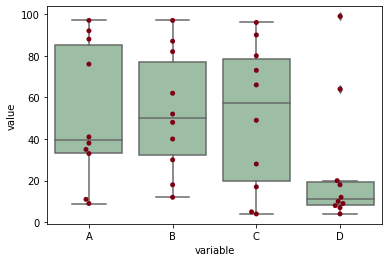

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='variable', y='value', data=a_df_melt, color='#99c2a2')
ax = sns.swarmplot(x="variable", y="value", data=a_df_melt, color='#7d0013')
plt.show()

In [7]:
fvalue, pvalue = stats.f_oneway(a_df['A'], a_df['B'], a_df['C'], a_df['D'])
print(fvalue, pvalue)

1.7249594239128412 0.17920877113948797


fvalue = 1.7249594239128412  
pvalue = 0.17920877113948797

p-value 값이 유의수준(0.05)보다 크기 때문에, 귀무가설을 채택한다.  
A, B, C, D 4개 그룹의 평균의 유의미한 차이가 있다고 보기는 어렵다.

In [17]:
a_df.mean()

A    52.0
B    52.8
C    50.8
D    25.1
dtype: float64

In [20]:
np.mean([38, 33, 35, 92, 76, 97, 88, 41, 11, 9])

52.0

# ANOVA 적용

In [41]:
df = pd.read_csv('df.csv', index_col=0)
df.drop('Year',axis=1).groupby('Genre').sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858750000.0,513640000.0,156600000.0,183990000.0
Adventure,101790000.0,63660000.0,51870000.0,16700000.0
Fighting,220350000.0,99900000.0,87140000.0,36150000.0
Misc,394730000.0,208150000.0,104180000.0,72640000.0
Platform,445380000.0,200630000.0,130530000.0,51450000.0
Puzzle,121580000.0,50470000.0,56240000.0,12440000.0
Racing,354700000.0,235020000.0,56320000.0,76510000.0
Role-Playing,318760000.0,183090000.0,342930000.0,56730000.0
Shooter,574480000.0,310230000.0,38180000.0,101860000.0


귀무가설: NA_Sales, EU_Sales, JP_Sales, Other_Sales 4개 그룹의 평균은 유의미한 차이가 있다고 보기 어렵다(같다).  
대립가설: NA_Sales, EU_Sales, JP_Sales, Other_Sales 4개 그룹의 평균은 유의미한 차이가 있다(같지 않다).

- 평균이라는 것은 이 지역에서 장르를 종합하여 계산했을때, 평균적으로 장르 구분없이 이정도 판매되었다는 것을 말한다.  
- 예를들어 북미 그룹은 8억5천만개의 액션장르, 1억 1백7십9만 개의 어드벤처 누적 판매량, 그외 다른 장르 별로 누적 판매량을 가졌다. 이 판매량을 모두 합하여, 장르의 개수(12개)로 나눠주면 북미지역에서 장르의 통상적인 평균 누적 판매량이 나온다. 이 수치는 358,920,000(3억 5천8백9십2만)개이다.  
- 다른 그룹의 평균도 구해보면, 유럽은 1억9천9백4십6만4천2백개, 일본은 1억5백9십4만9천2백개, 기타지역은 6억5천2백8십만8천3백개이다.  
- 따라서, 4개 그룹의 평균은 유의미한 차이가 있다(같지 않다).
- 일원분산분석 수행 결과를 예상해보자면, 귀무가설을 기각하고 대립가설을 채택해야 한다.
- p-value는 0.05보다 작아야 한다.

In [42]:
df_melt = pd.melt(df.reset_index(), id_vars=['Genre'], value_vars=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'])

In [39]:
fvalue, pvalue = stats.f_oneway(df['NA_Sales'], df['EU_Sales'], df['JP_Sales'], df['Other_Sales'])

In [40]:
print('games 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.10f}'.format(fvalue, pvalue))
if pvalue < 0.05:
    print('P-value 값이 충분히 작음으로, 4개 지역 그룹의 평균값이 통계적으로 유의미하게 차이난다.')

games 데이터의 일원분산분석 결과 : F=565.5, p=0.0000000000
P-value 값이 충분히 작음으로, 4개 지역 그룹의 평균값이 통계적으로 유의미하게 차이난다.


#### 분석 과정 중 시도해본 것들

- df_melt 행의 수(64964 rows)가 너무 많아 시각화는 어렵다 

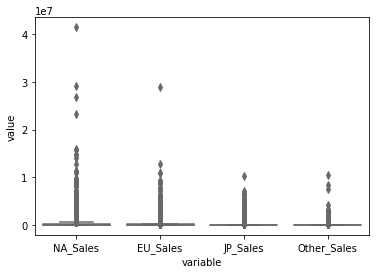

In [26]:
ax = sns.boxplot(x='variable', y='value', data=df_melt, color='#99c2a2')
plt.show()

- 단위를 쉽게 읽기위해 M단위(나누기1,000,000)로 바꿔보았다.
- 결과는 같다.

In [29]:
df.iloc[:,-4:] = df.iloc[:,-4:]/1000000
df_melt = pd.melt(df.reset_index(), id_vars=['Genre'], value_vars=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'])
fvalue, pvalue = stats.f_oneway(df['NA_Sales'], df['EU_Sales'], df['JP_Sales'], df['Other_Sales'])
print(fvalue, pvalue)

565.496803722431 0.0
